In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

(768, 1366, 3)
(100, 177, 3)
(17700, 3)


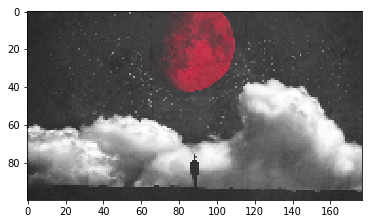

In [2]:
im = cv2.imread('./Screenshot.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

print(im.shape)

r, c = im.shape[:2]
out_r = 100
im = cv2.resize(im, (int(out_r*float(c)/r), out_r)) #Keeping the Aspect Ratio of the Image same while resizing
print(im.shape)

pixels = im.reshape((-1, 3))
print(pixels.shape)

plt.imshow(im)
plt.show()

In [3]:
km = KMeans(n_clusters=4)
km.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
centr_colors = np.array(km.cluster_centers_,dtype='uint8')
print(centr_colors.dtype)
print(centr_colors)

print(centr_colors.shape)

uint8
[[ 60  58  59]
 [228 227 228]
 [164 163 164]
 [120  88  93]]
(4, 3)


In [5]:
freq = np.array(np.unique(km.labels_, return_counts=True)[1], dtype='float32')
print(freq)
print(freq.sum())
freq = freq/pixels.shape[0]
print(freq)

[10126.  2214.  1637.  3723.]
17700.0
[0.5720904  0.12508474 0.09248587 0.21033898]


In [6]:
dom = [[freq[ix], centr_colors[ix]] for ix in range(km.n_clusters)]

DOM = sorted(dom, key=lambda z:z[0], reverse=True)
#DOM = np.array(DOM)
print(DOM[0][1])
#print DOM.shape

[60 58 59]


In [7]:
for ix in DOM:
    print(ix)
    print("----------")

[0.5720904, array([60, 58, 59], dtype=uint8)]
----------
[0.21033898, array([120,  88,  93], dtype=uint8)]
----------
[0.12508474, array([228, 227, 228], dtype=uint8)]
----------
[0.092485875, array([164, 163, 164], dtype=uint8)]
----------


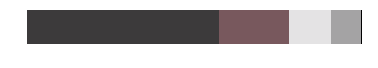

In [8]:
patch = np.ones((50, 500, 3))
start = 0
for ix in range(km.n_clusters):
    width = int(DOM[ix][0]*patch.shape[1])
    end = start+width
    patch[:,start:end,:] = DOM[ix][1]
    start = end
    plt.axis("off")
    plt.imshow(patch/255)
plt.show()